## GPU Configuration and Imports <a class="anchor" id="GPU-Configuration-and-Imports"></a>

In [1]:
import os # Configure which GPU 
gpu_num = 0 # Use "" to use the CPU
os.environ["CUDA_VISIBLE_DEVICES"] = f"{gpu_num}"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# Colab does currently not support the latest version of ipython.
# Thus, the preview does not work in Colab. However, whenever possible we 
# strongly recommend to use the scene preview mode.
try: # detect if the notebook runs in Colab
    import google.colab
    colab_compat = True # deactivate preview
except:
    colab_compat = False
resolution = [480,320] # increase for higher quality of renderings

# Allows to exit cell execution in Jupyter
class ExitCell(Exception):
    def _render_traceback_(self):
        pass

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna

# Configure the notebook to use only a single GPU and allocate only as much memory as needed
# For more details, see https://www.tensorflow.org/guide/gpu
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e) 
# Avoid warnings from TensorFlow
tf.get_logger().setLevel('ERROR')

tf.random.set_seed(1) # Set global random seed for reproducibility
            
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys
    
from sionna.channel import cir_to_time_channel
from sionna.rt import load_scene, PlanarArray, Transmitter, Receiver, RadioMaterial, Camera, LambertianPattern, DirectivePattern, BackscatteringPattern
from sionna.rt.utils import r_hat
from sionna.constants import PI, SPEED_OF_LIGHT
from sionna.utils import expand_to_rank

from PIL import Image
from IPython.display import display
import time

24k-roof : roof
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
24k-wall : wall
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
Morning_House早餐-roof : roof
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
Morning_House早餐-wall : wall
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
Plane : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
tf.Tensor(5.24, shape=(), dtype=float32)
tf.Tensor(0.123086944, shape=(), dtype=float32)
tf.Tensor(5.24, shape=(), dtype=float32)
T-house-roof : roof
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
T-house-wall : wall
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
element-roof : roof
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)
element-wall : wall
tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=fl

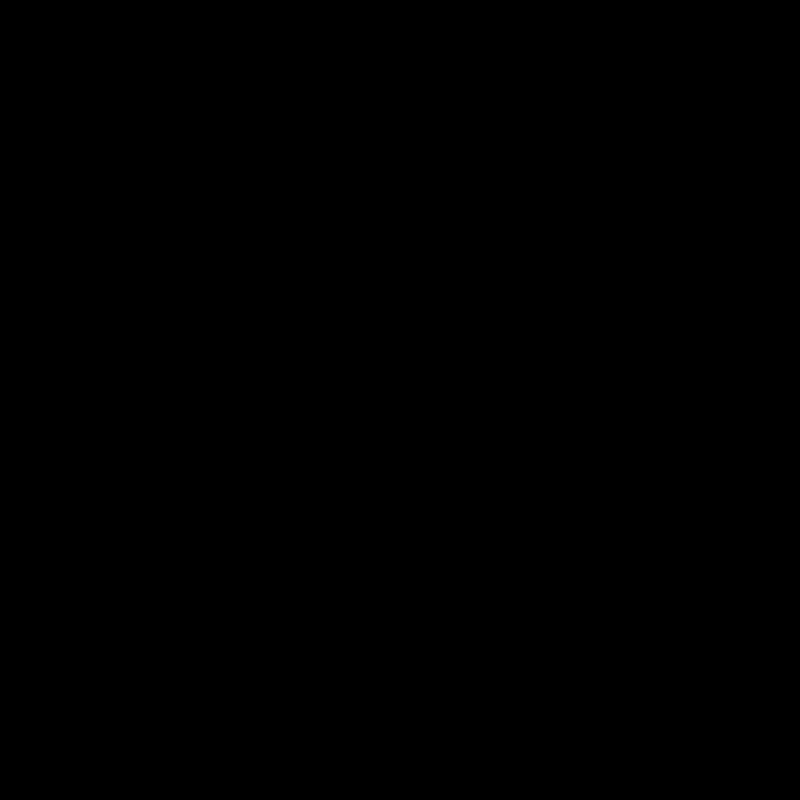

Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, position=(0.0, 0.0, …

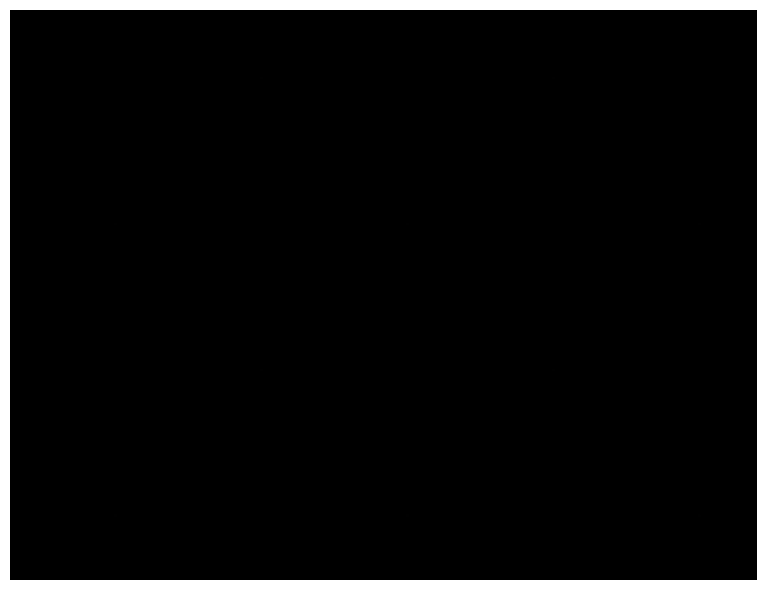

In [2]:
# scene_path=sionna.rt.scene.simple_street_canyon
# scene_path="my_scene/nycu_test/nycu_test.xml"
scene_path="my_scene/nycu_test_v2/nycu_test_v2.xml"
# scene_path="my_scene/testv2/testv2.xml"
scene = load_scene(scene_path)
for i, obj in enumerate(scene.objects.values()):
    print(f"{obj.name} : {obj.radio_material.name}")
    print(scene.get(obj.name).radio_material.conductivity)
    print(scene.get(obj.name).radio_material.relative_permittivity)
    if "Plane" in obj.name:
        print("=============================================================")
        print(scene.get(obj.name).radio_material.conductivity)
        print(scene.get(obj.name).radio_material.relative_permittivity)
    # print(f"{obj.name}")
    pass
# Open 3D preview (only works in Jupyter notebook)
# Add a camera for visualization
scene.remove("my_cam")
scene.add(Camera("my_cam", position=[0, 0, 100], look_at=[0,0,0]))
scene.render(camera="my_cam", num_samples=512);
render_to_file=True
if render_to_file:
    filename="image/test_my_cam.png"
    scene.render_to_file(camera="my_cam", # Also try camera="preview"
                         filename=filename,
                         resolution=[800,800]
                        )
    img = Image.open(filename)
    display(img)
scene.preview()


In [3]:
print(scene.get("Plane").radio_material.conductivity)
water_material = RadioMaterial("my_material",
                                relative_permittivity=80.2,
                                conductivity=0.3,
                                scattering_pattern=LambertianPattern())
for i, obj in enumerate(scene.objects.values()):
    if "water" in obj.radio_material.name:
        scene.get(obj.name).radio_material=water_material
        print("=============================================================")
    else:
        scene.get(obj.name).radio_material=scene.get("Plane").radio_material
    print(f"{obj.name} : {obj.radio_material.name}")
    print(scene.get(obj.name).radio_material.conductivity)

tf.Tensor(0.123086944, shape=(), dtype=float32)
24k-roof : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
24k-wall : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
Morning_House早餐-roof : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
Morning_House早餐-wall : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
Plane : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
T-house-roof : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
T-house-wall : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
element-roof : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
element-wall : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
element_001-roof : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
element_001-wall : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
element_002-roof : itu_concrete
tf.Tensor(0.123086944, shape=(), dtype=float32)
element_002-wall : itu_conc

used time of computing paths: 0.7415093360004903s
used time of coverage map: 4.319509244999608s


Renderer(camera=PerspectiveCamera(aspect=1.31, children=(DirectionalLight(intensity=0.25, matrixWorldNeedsUpda…

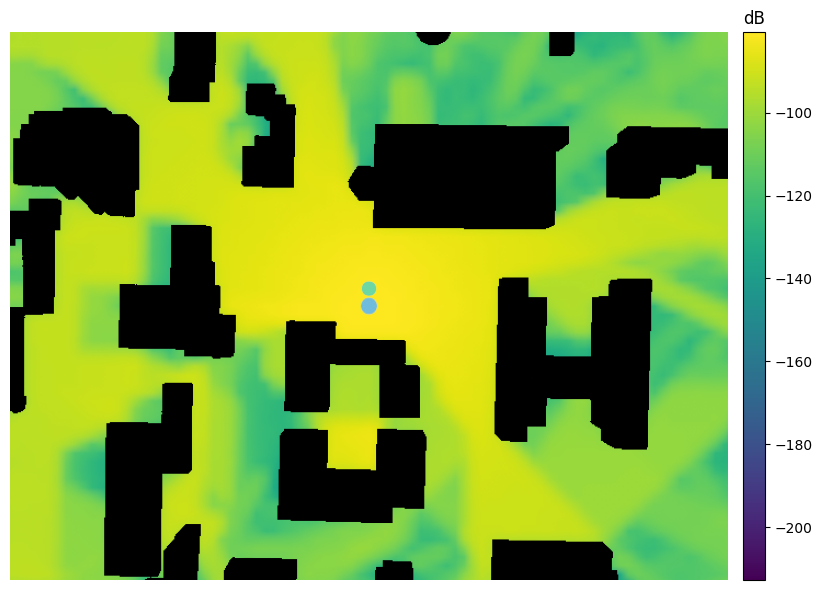

In [8]:
# scene_path="my_scene/nycu_test/nycu_test.xml"
# scene = load_scene(scene_path)
scene.remove("my_cam")
scene.remove("tx")
scene.remove("rx")
# Set the carrier frequency
scene.frequency = 5.8e9
wavelength = scene.wavelength


scene.add(Camera("my_cam", position=[0, 0, 500], look_at=[0,0,0]))
# Configure the transmitter and receiver arrays
scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="iso",
                             polarization="V")

scene.rx_array = scene.tx_array

tx_position=[0,0,50]
scene.add(Transmitter(name="tx", position=tx_position))
tx_position=np.array(tx_position)

rx_position=[10, 0, 1]
scene.add(Receiver(name="rx", position=rx_position))

t_start = time.perf_counter()
paths = scene.compute_paths(los=True, reflection=True, scattering=True, scat_keep_prob=0.001)
t_end = time.perf_counter()
print(f"used time of computing paths: {t_end-t_start}s")

# Open 3D preview (only works in Jupyter notebook)
t_start = time.perf_counter()
cm = scene.coverage_map(max_depth=5,
                        diffraction=True, # Disable to see the effects of diffraction
                        cm_cell_size=(5., 5.), # Grid size of coverage map cells in m
                        combining_vec=None,
                        precoding_vec=None,
                        num_samples=int(20e6)) # Reduce if your hardware does not have enough memory
t_end = time.perf_counter()
print(f"used time of coverage map: {t_end-t_start}s")
render_to_file=False
# scene.render("my_cam",num_samples=512 , paths=paths , coverage_map=cm);
scene.render(camera="my_cam",num_samples=512 , coverage_map=cm);
if render_to_file:
    filename="image/test.png"
    scene.render_to_file(camera="my_cam", # Also try camera="preview"
                         filename=filename,
                         paths=paths,
                         # coverage_map=cm
                         )
    img = Image.open(filename)
    display(img)

# scene.preview(paths=paths, coverage_map=cm)
scene.preview( coverage_map=cm, paths=paths)

[-80.926865 -81.00585  -81.09735  -81.20075  -81.31512  -81.44133
 -81.57483  -81.71642  -81.829605 -81.99452 ]


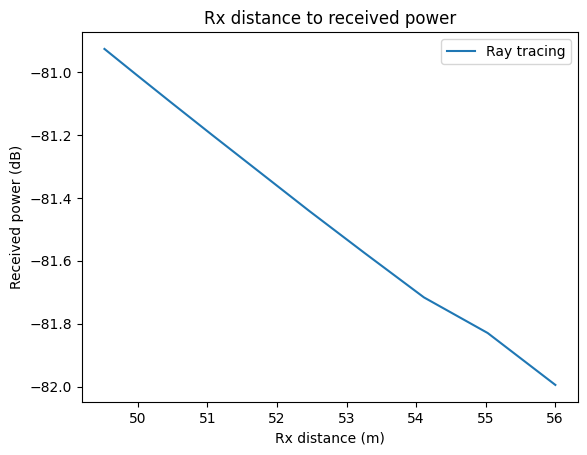

In [11]:
scene.remove("tx")
scene.remove("rx")
scene.remove("my_cam")
# Set the carrier frequency
scene.frequency = 5.8e9
wavelength = scene.wavelength


scene.add(Camera("my_cam", position=[0, 0, 500], look_at=[0,0,0]))
# Configure the transmitter and receiver arrays
scene.tx_array = PlanarArray(num_rows=1,
                             num_cols=1,
                             vertical_spacing=0.5,
                             horizontal_spacing=0.5,
                             pattern="iso",
                             polarization="V")

scene.rx_array = scene.tx_array

tx_position=[0,0,50]
scene.add(Transmitter(name="tx", position=tx_position))
tx_position=np.array(tx_position)

rx_positions=[]
for i in range(10):
    rx_positions.append([10+i*2,0,1.5])
rx_positions=np.array(rx_positions)
distances = np.linalg.norm(rx_positions - tx_position, axis=1)
# print(distances)
received_powers = np.zeros_like(np.array(distances), np.float32)


render_to_file = True # Set to True to render image to file
for i, rx_position in enumerate(rx_positions):
    scene.add(Receiver(name="rx", position=rx_position))
    paths = scene.compute_paths(los=True, reflection=True, scattering=True, scat_keep_prob=0.001)
    received_powers[i] = 10*np.log10(tf.reduce_sum(tf.abs(paths.a)**2))

    # print(f"There are {tf.size(paths.a).numpy()} scattered paths.")
    # print(paths.a)
    # print(tf.abs(paths.a))
    # print(tf.abs(paths.a)**2)
    
    # Render scene to file from preview viewpoint
    if render_to_file:
        filename="image/scene{0:03d}.png".format(i)
        scene.render_to_file(camera="my_cam", # Also try camera="preview"
                             filename=filename,
                             resolution=[1000,1000],
                             paths=paths)
        img = Image.open(filename)
        # display(img)

    

    scene.remove("rx")
    
print(received_powers)
plt.figure()
plt.plot(distances, received_powers, label="Ray tracing")
plt.xlabel("Rx distance (m)")
plt.ylabel("Received power (dB)");
plt.title("Rx distance to received power");
plt.legend();

In [12]:
# paths.a

<tf.Tensor: shape=(1, 1, 1, 1, 1, 402, 1), dtype=complex64, numpy=
array([[[[[[[ 7.3447583e-05+0.0000000e+00j],
            [ 2.4347381e-05-1.5865634e-06j],
            [-1.2102821e-06+3.7686655e-07j],
            [ 1.0377131e-06+1.4622512e-07j],
            [ 2.0885739e-06-1.9069105e-08j],
            [-1.3746570e-05+8.8723709e-07j],
            [-9.8983837e-06+5.8712720e-07j],
            [-5.6934655e-06+3.3199592e-07j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.0000000e+00j],
            [ 0.0000000e+00+0.000

In [16]:
rx_array=cm.sample_positions(10)
rx_array[0][2]

<tf.Tensor: shape=(), dtype=float32, numpy=1.5>